In [1]:
import os
import numpy as np
import sys

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# given a directory and a list of the wanted classes, it parses all files
# in the directory that start with tracelog and extract the running times
# for the wanted classes
# the return structure is a list of lists, each list contains 4 elements
# [PErank, regeionName, inclusiveTime, exclusiveTime]
#
# returnes list is ordered by PE rank

def getAllTimes( directory, wantedClasses):
    
    if not os.path.exists(traceDir):
        print("Given directory" + traceDir + "does not exist.\nAborting...")
        exit(-1)
    
    allTimes = []
    
    #all files in the directory
    for traceFile in os.listdir(traceDir):
        if not traceFile.startswith("tracelog"):
            continue

        thisPE = traceFile.split('.')[2]
        #print(thisPE)
        #print(traceFile)

        with open( os.path.join(traceDir,traceFile) ) as f:
            #line = f.readline()
            for line in f:

                splittedLine = line.split()
                #print(splittedLine)
                if len( splittedLine )<2: #this line does not contain data to gather
                    continue

                region = splittedLine[1]  #the format that scai uses
                regionClass = region.split('.')[0]

                #print( region )
                #gather for some interesting classes, not all
                if not regionClass in interestClasses: 
                    continue

                inclusInd = splittedLine.index('inclusive')
                inclTime = splittedLine[inclusInd+2][:-1]  #last char is a comma
                exclTime = splittedLine[-1]

                allTimes.append( [thisPE, region, inclTime, exclTime] )

    allTimes.sort( key= lambda x: int(x[0]) )
    
    return allTimes

In [26]:
# allTimes as returned from getAllTimes
# wantedPEs, a list of numbers for the wanted PEs to plot
# wantedRegions, the names of the wanted regions to plot

def plotWantedPEsWantedRegions( allTimes, wantedPEs, wantedRegions ):
    numWantedPES = len(wantedPEs)
    numWantedRegions = len(wantedRegions)
    
    wantedTimes = []

    # t[0] is the PErank, t[1] is the region name
    for t in allTimes:
        if ( int(t[0]) in wantedPEs) and (t[1] in wantedRegions):
            wantedTimes.append(t)
    
    #print(wantedTimes)
    timesPerPE = [[]]*numPEs
    
    #remember: in allTimes, data are sorted by PE rank. Also, the regions
    #appear in the same order
    for wt in wantedTimes:
        thisPE = int(wt[0])
        inclTime = float(wt[2])
        timesPerPE[thisPE].append( inclTime )
        #timesPerPE.append( [x[2] for x in wantedTimes if pe in wantedPEs] )
    
    #print(timesPerPE)
    print( len( timesPerPE ) )
    print( len( timesPerPE[0] ) )
    
    assert( len(timesPerPE)==numWantedPES )
    assert( len)
    
    fig, ax = plt.subplots(figsize=(15,15))
    plt.rcParams.update({'font.size': 25})
    
    plt.title( wantedPEs  )

    for i in range(numWantedRegions):
        plt.plot( timesPerPE[i], label=wantedRegions[i])

    plt.xticks(np.arange( 0, numRegions, 1.0), fontsize=14)
    plt.show()
    

In [5]:
traceDir = "/home/harry/supermuc/geographer_experiments/base-run/jobOutputs/"

interestClasses = ['MultiLevel', 'LocalRefinement', 'ParcoRepart']

allTimes = getAllTimes( traceDir, interestClasses )

#print([x for x in allTimes if x[1].startswith("LocalRefinement.distr")])

In [6]:
numPEs = max([int(x[0]) for x in allTimes])

In [7]:
#get all timed region names

regionNames = sorted( set([x[1] for x in allTimes ]) ) 
numRegions = len(regionNames)    

#for i in range(0,numRegions):
#    print(i, regionNames[i])

## Plot per wanted timed region

## Get statistical info

In [10]:
allTimesPerRegion = []  #this is a list of lists
allVariancesPerRegion = []
allSTDPerRegion = []
allMeanTimerPerRegion = []

#for all regions
for w in range(numRegions):
    thisRegionTimes = [ float(x[2]) for x in allTimes if x[1]==regionNames[w]]
    allTimesPerRegion.append( thisRegionTimes )
    allVariancesPerRegion.append( np.var(thisRegionTimes))
    allSTDPerRegion.append( np.std(thisRegionTimes))
    allMeanTimerPerRegion.append( np.mean(thisRegionTimes) )

#print( np.argsort(allVariancesPerRegion) )
#print( np.argsort(allMeanTimerPerRegion) )
for i in np.argsort(allMeanTimerPerRegion)[-10:]:
    print(i, regionNames[i])

17 LocalRefinement.getInterfaceNodes.communication.syncswap
16 LocalRefinement.getInterfaceNodes.communication
14 LocalRefinement.getInterfaceNodes
2 LocalRefinement.distributedFMStep.loop
0 LocalRefinement.distributedFMStep
47 MultiLevel.multiLevelStep.localRefinement
53 ParcoRepart.doLocalRefinement.multiLevelStep
52 ParcoRepart.doLocalRefinement
57 ParcoRepart.partitionGraph
45 MultiLevel.multiLevelStep


## Plot mean for all PEs

In [12]:
#plot per region

#get top 5 with highest standart deviation
wantedRegions = np.argsort(allMeanTimerPerRegion)[-10:].tolist()
wantedRegions = wantedRegions[::-1]

#wantedRegionNames = [regionNames[i] for i in range(numRegions) if i in wantedRegions]
wantedRegionNames = []

for wr in wantedRegions:
    wantedRegionNames.append( regionNames[wr] )

print(wantedRegions)
print(wantedRegionNames)

inclTimesForWantedRegions=[]

for wr in wantedRegionNames:
    inclTimesForWantedRegions.append( [ float(x[2]) for x in allTimes if x[1]==wr ] )
    
PEidsForWantedRegion = [ int(x[0]) for x in allTimes if x[1]==wantedRegionNames[0]]

assert( len(inclTimesForWantedRegions[0])==len(PEidsForWantedRegion) )

[45, 57, 52, 53, 47, 0, 2, 14, 16, 17]
['MultiLevel.multiLevelStep', 'ParcoRepart.partitionGraph', 'ParcoRepart.doLocalRefinement', 'ParcoRepart.doLocalRefinement.multiLevelStep', 'MultiLevel.multiLevelStep.localRefinement', 'LocalRefinement.distributedFMStep', 'LocalRefinement.distributedFMStep.loop', 'LocalRefinement.getInterfaceNodes', 'LocalRefinement.getInterfaceNodes.communication', 'LocalRefinement.getInterfaceNodes.communication.syncswap']


27
250


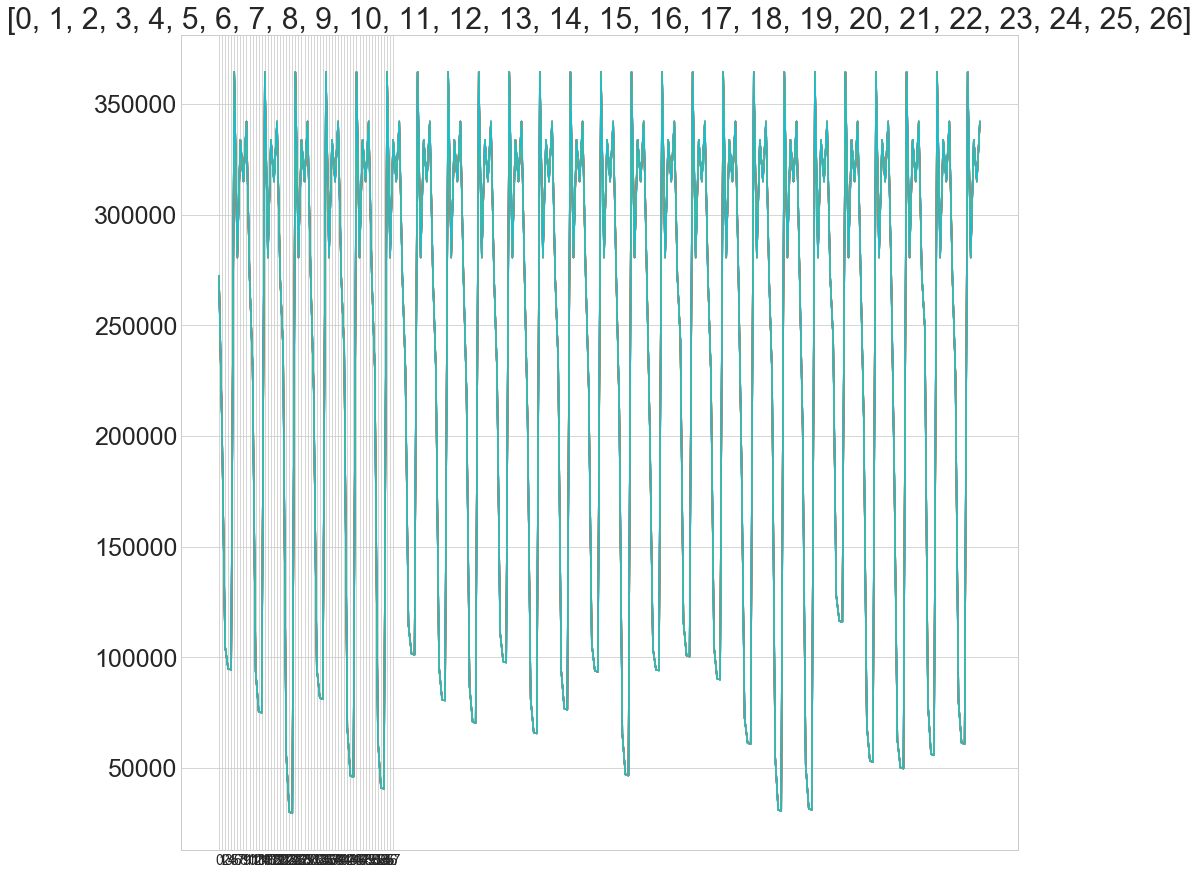

In [27]:
allPEs = [i for i in range(numPEs)]
plotWantedPEsWantedRegions( allTimes, allPEs, wantedRegionNames )

In [51]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

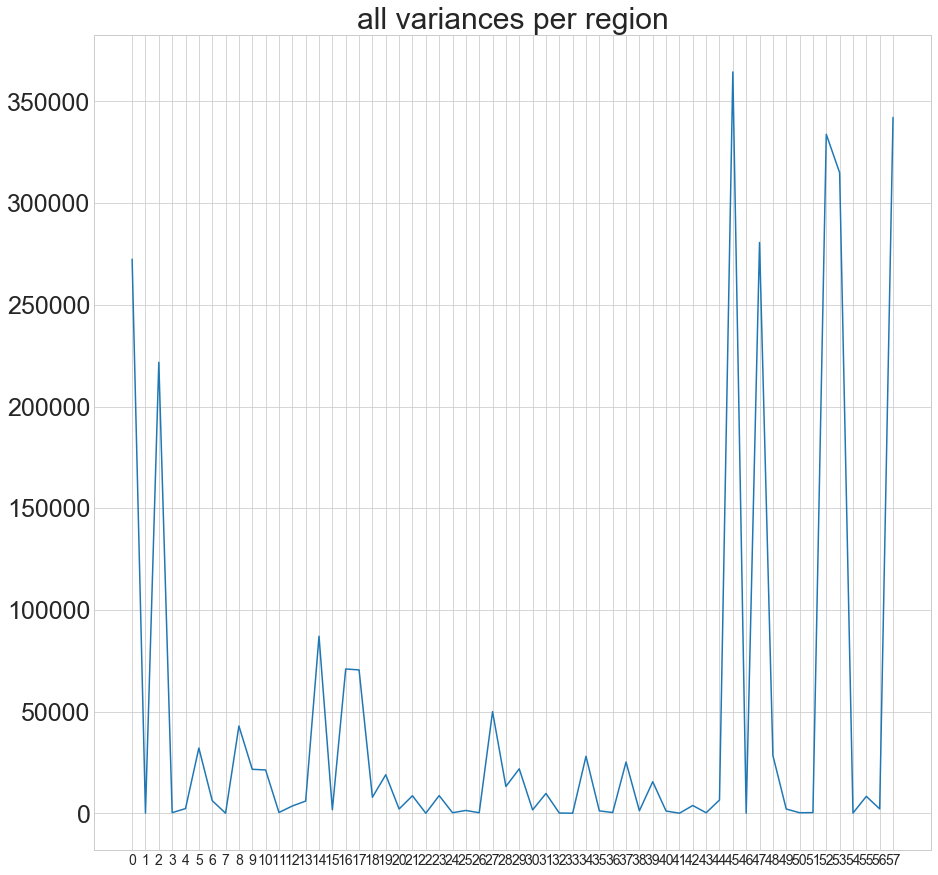

In [212]:
fig, ax = plt.subplots(figsize=(15,15))
plt.rcParams.update({'font.size': 25})

plt.title( "all variances per region"  )

#plt.plot(allVariancesPerRegion)
plt.plot( allMeanTimerPerRegion )

plt.xticks(np.arange( 0, numRegions, 1.0), fontsize=14)
plt.show()

27
250


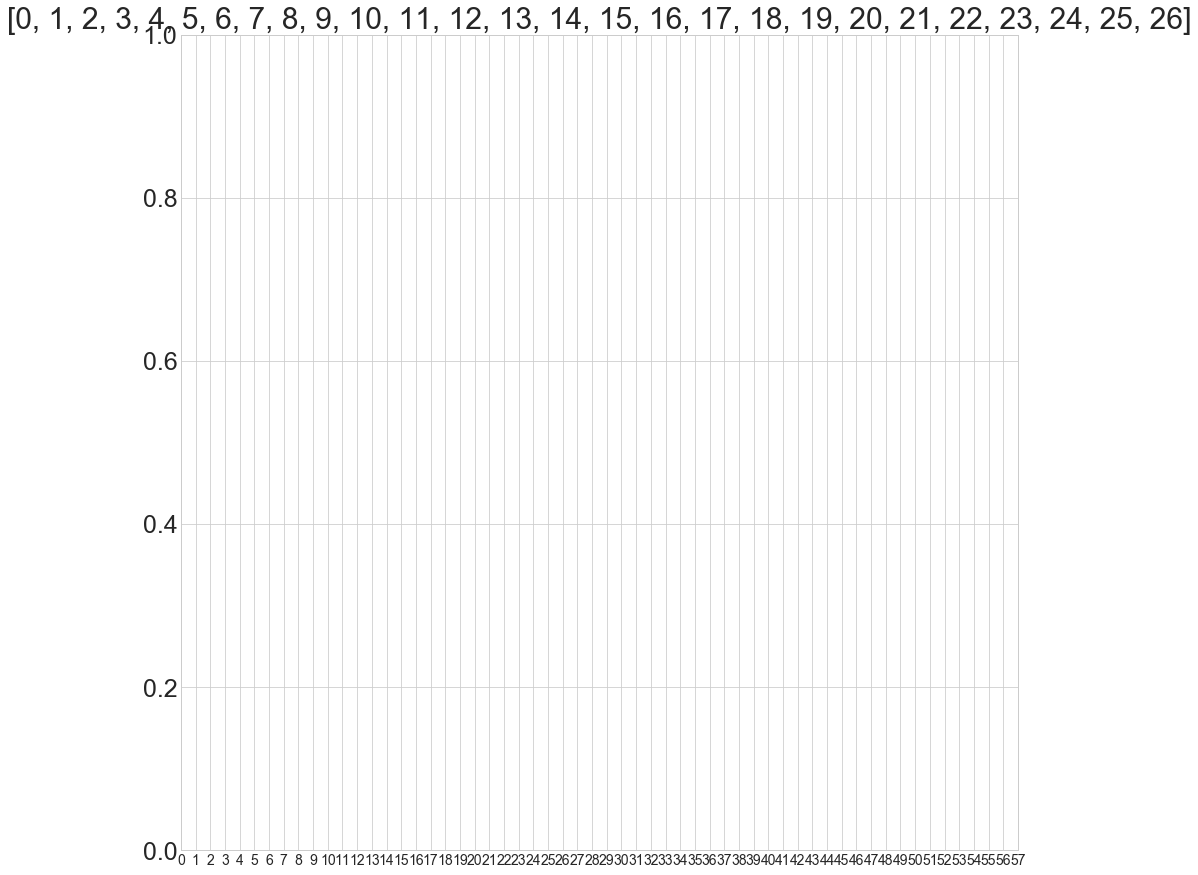

<function matplotlib.pyplot.show>

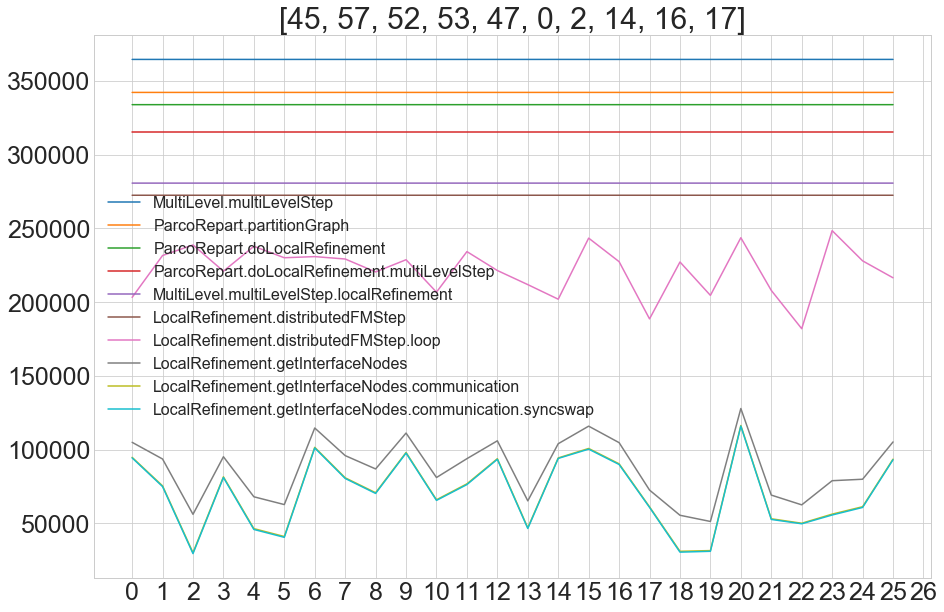

In [217]:
fig, ax = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 25})

plt.title( wantedRegions )

for i in range( len(wantedRegionNames) ):
    wrTimes = inclTimesForWantedRegions[i]
    plt.plot( wrTimes, label=wantedRegionNames[i] )

plt.xticks(np.arange( 0, numPEs, 1.0))
#ax.set_yscale('log', basey=10)

#ax.ticklabel_format(useOffset=False)
plt.legend( fontsize=16 )
plt.show

## Plot for wanted processor

In [219]:
wantedPEs = [ 4, 20, 22, 24, 25]

numWantedPES = len(wantedPEs)

allTimesForWantedPEs = []

for w in wantedPEs:
    allTimesForWantedPEs.append( [ float(x[2]) for x in allTimes if int(x[0])==w ] )


<function matplotlib.pyplot.show>

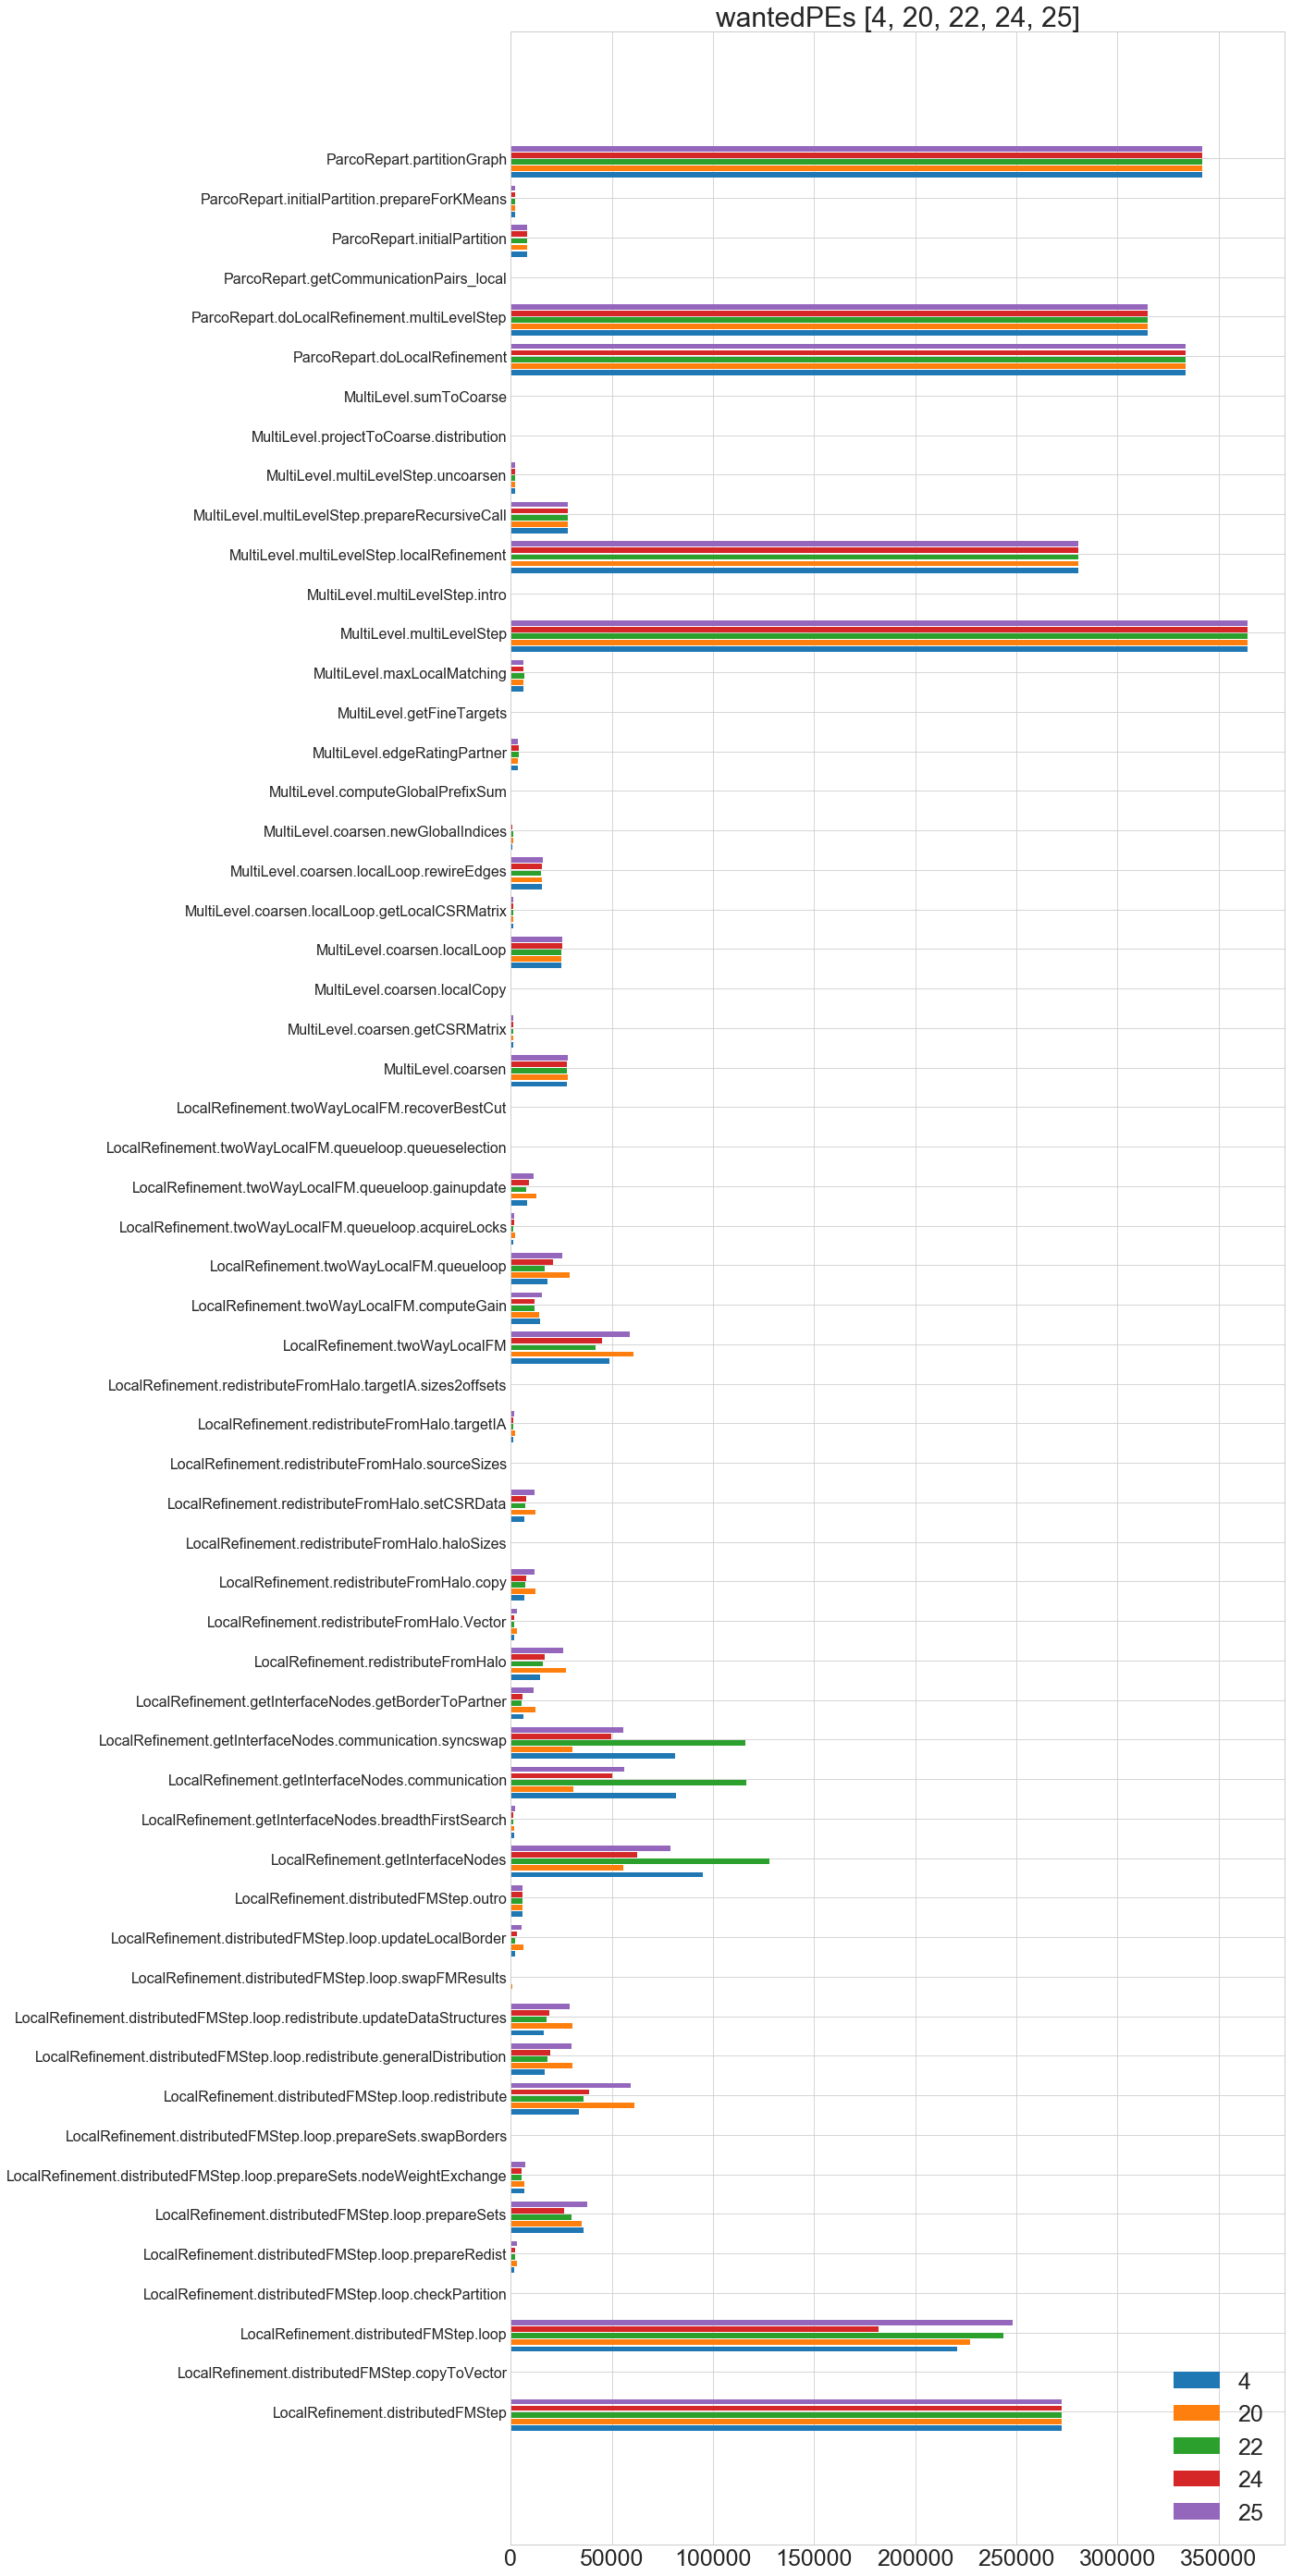

In [220]:
fig, ax = plt.subplots(figsize=(15,50))
plt.rcParams.update({'font.size': 25})

plt.title( "wantedPEs " +str(wantedPEs) )
plt.yticks( [j*(numWantedPES+1)+numWantedPES/2 for j in range(numRegions)], regionNames, rotation=0, fontsize=16 )

for i in range( numWantedPES ):
    assert( numRegions == len(allTimesForWantedPEs[i]) )
    
    yticksList = [j*(numWantedPES+1)+i for j in range(numRegions)]
    plt.barh( yticksList, allTimesForWantedPEs[i], label=wantedPEs[i] )

plt.legend()
plt.show

In [ ]:
def plotRawTimes( allTimes, wantedPEs, wantedRegions):
